<a href="https://colab.research.google.com/github/ripky/OFA/blob/main/best_accuracy_image_classification_cifar_dataset_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image Classification With CNN Using Keras

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.


[Cifar10 Details](https://https://www.cs.toronto.edu/~kriz/cifar.html)

[Cifar10 Keras Implementation](https://keras.io/examples/cifar10_cnn/)




#1.Import Libraries

In [11]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

if not os.path.isdir('models'):
  os.mkdir('models')


print("tf version: ", tf.__version__)
print("Is Using GPU? ",tf.test.is_gpu_available())

tf version:  2.8.0
Is Using GPU?  True


#2. Load Data

In [12]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

def dataset_shape(train=True, test=True):
  if train:
    print("Training sets (no_of_images_samples, height, width, color_channel )  :  ", X_train.shape)
    print("Training classes (output_classes_for_no_of_image, 1)   :  ", y_train.shape)
  if test:
    print("Test sets (no_of_images_samples, height, width, color_channel )    :  ", X_test.shape)
    print("Test classes (output_classes_for_no_image, 1)   :  ", y_test.shape)
  print()

dataset_shape()


Training sets (no_of_images_samples, height, width, color_channel )  :   (50000, 32, 32, 3)
Training classes (output_classes_for_no_of_image, 1)   :   (50000, 1)
Test sets (no_of_images_samples, height, width, color_channel )    :   (10000, 32, 32, 3)
Test classes (output_classes_for_no_image, 1)   :   (10000, 1)



#3. Preprocess Data

In [13]:

#menggunakan beberapa kelas untuk mengurangi waktu komputasi
def get_classes(X, y, choice_classes=list(range(10))): 
  #melihat data cifar dari indeks nol
  if len(choice_classes) != 10:
    indices = []
    for classes in choice_classes:
      index, _ = np.where(y == float(classes))
      indices.append( index )
    index_classes = np.concatenate(indices, axis = 0)  #indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)

    X = X[index_classes]
    y = y[index_classes]


  #merandom sampel secara acak
  no_sample = X.shape[0]
  shuffled_index = np.random.choice(range(no_sample), no_sample, replace=False)
  X = X[shuffled_index]
  y = y[shuffled_index]

  """
  preprocess the predicton y samples to fit for classification
  Example :
    Before : y => [1] or y=> [0]
    After : y => [0, 0, 1] or y=>[0, 0, 0] #Here depth is no of classes choosen.
  """
  y = tf.keras.utils.to_categorical(y)

  return X, y


**Shuffle Samples**

In [14]:
#kelas pada cifar 10
cifar10_all_classes = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#memlih kelas tertentu yang ingin dicoba
choice_classes = [0,1,2] # list(range(10))
cifar10_classes = [ cifar10_all_classes[i] for i in choice_classes]
X_train , y_train = get_classes(X_train, y_train, choice_classes)
X_test, y_test = get_classes(X_test, y_test, choice_classes)

#melihat bentuk dataset
dataset_shape()

Training sets (no_of_images_samples, height, width, color_channel )  :   (15000, 32, 32, 3)
Training classes (output_classes_for_no_of_image, 1)   :   (15000, 3)
Test sets (no_of_images_samples, height, width, color_channel )    :   (3000, 32, 32, 3)
Test classes (output_classes_for_no_image, 1)   :   (3000, 3)



#4. Visualize Samples

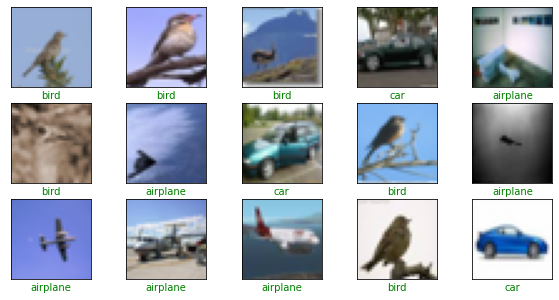

In [15]:
def show_random_samples(x, y, predicts, samples=10):
  indices = np.random.choice(range(x.shape[0]), samples, replace=False)

  x = x[indices]
  y = y[indices]
  predicts = predicts[indices]

  plt.figure(figsize=(10, 5))
  for i in range(samples):
    plt.subplot(3, 5, i+1)
    plt.imshow(x[i])
    plt.xticks([])
    plt.yticks([])
    clr = 'green' if np.argmax(y[i]) == np.argmax(predicts[i]) else 'red'
    plt.xlabel(cifar10_classes[np.argmax(predicts[i])], color=clr)
  plt.show()

# melihat predikdi nilai y_train sebelum melatih modelnya
show_random_samples(X_train, y_train, y_train, samples=15)


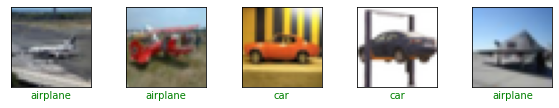

In [16]:
show_random_samples(X_test, y_test, y_test, samples=5)

#5. Create Model

[Activation function](https://en.wikipedia.org/wiki/Activation_function)

Non-Linear activation function:

*   [sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function)
*   [tanh](https://en.wikipedia.org/wiki/Hyperbolic_functions)
*   [relu](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) Usually relu activation performs well in the most of the case.
*    softmax

[Softmax axtivation function](https://en.wikipedia.org/wiki/Softmax_function) : used for classification problem which gives probability of all output value, which sum gives one.

In [17]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Input, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [49]:
def create_model():

  model = Sequential()
  #untuk layer pertama kita perlu menentukan bentuk input
  model.add(Input(shape=(32, 32, 3)))
  model.add(Conv2D(16, kernel_size=3, activation='relu', padding='same')) 
  model.add(BatchNormalization())
  model.add(Conv2D(16, kernel_size=3,activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(32, kernel_size=3, activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, kernel_size=3, activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))


  model.add(Flatten())
  # Softmasx Activation is used for classification
  model.add(Dense(200, activation='relu'))
  model.add(Dense(100, activation='tanh'))
  model.add(Dense(len(choice_classes), activation='softmax'))

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  return model

model = create_model()
model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_73 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 batch_normalization_35 (Bat  (None, 32, 32, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_74 (Conv2D)          (None, 30, 30, 16)        2320      
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 15, 15, 16)       0         
 g2D)                                                            
                                                                 
 dropout_37 (Dropout)        (None, 15, 15, 16)        0         
                                                                 
 conv2d_75 (Conv2D)          (None, 15, 15, 32)      

#6. Train Model

In [53]:
history = model.fit(
    X_train/255., y_train,
    validation_data = (X_test/255., y_test),
    epochs = 100, batch_size = 128,
)
#earlystopping is used to monitor the parameter with patience, it stops execution after it reache patience limit, "try different patients parameter"
#Model checkpoint save the best model respect to the monitor parameter

Epoch 1/100
118/118 [==============================] - 2s 21ms/step - loss: 0.0975 - accuracy: 0.9634 - val_loss: 0.1922 - val_accuracy: 0.9290
Epoch 2/100
118/118 [==============================] - 2s 19ms/step - loss: 0.0912 - accuracy: 0.9660 - val_loss: 0.1807 - val_accuracy: 0.9340
Epoch 3/100
118/118 [==============================] - 2s 19ms/step - loss: 0.0949 - accuracy: 0.9619 - val_loss: 0.2874 - val_accuracy: 0.9137
Epoch 4/100
118/118 [==============================] - 2s 19ms/step - loss: 0.0944 - accuracy: 0.9635 - val_loss: 0.3159 - val_accuracy: 0.9020
Epoch 5/100
118/118 [==============================] - 2s 19ms/step - loss: 0.0892 - accuracy: 0.9673 - val_loss: 0.2451 - val_accuracy: 0.9263
Epoch 6/100
118/118 [==============================] - 2s 19ms/step - loss: 0.0855 - accuracy: 0.9673 - val_loss: 0.2272 - val_accuracy: 0.9273
Epoch 7/100
118/118 [==============================] - 2s 19ms/step - loss: 0.0888 - accuracy: 0.9655 - val_loss: 0.3716 - val_accuracy:

In [54]:
test_loss, test_acc = model.evaluate(X_test/255., y_test)

94/94 [==============================] - 0s 5ms/step - loss: 0.2620 - accuracy: 0.9383


#7. Prediction

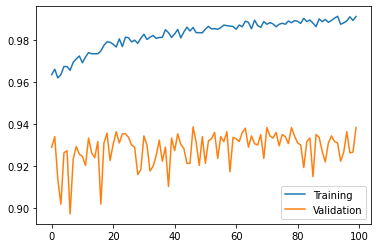

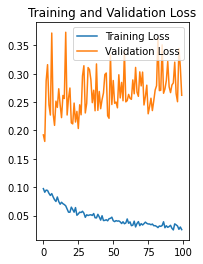

In [55]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(range(len(accuracy)), accuracy, label='Training')
plt.plot(range(len(val_accuracy)), val_accuracy, label='Validation')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


plt.subplot(1, 2, 2)
plt.plot(range(len(acc)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

***Load best saved model*** 

***All Test Sample predictions***

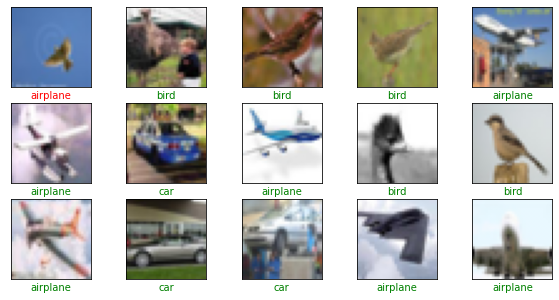

In [58]:
preds = model.predict(X_test/255.)
show_random_samples(X_test/255., y_test, preds, samples=15)
#hasil predict berdasarkan akurasi 

***Image Prediction***

In [59]:
def plot_img(image, target, preds):
  # plt.figure(figsize=(10,5))

  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  clr = 'green' if np.argmax(target) == np.argmax(preds) else 'red'
  plt.xlabel(cifar10_classes[np.argmax(preds)], color=clr, fontsize=50)
  plt.show()


Image index from test samples:  1924
Traget label:  car

Prediction


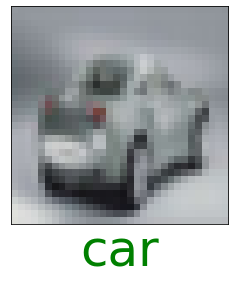

In [61]:
random_image = np.random.randint(X_test.shape[0])
print("Image index from test samples: ", random_image)
image = np.expand_dims(X_test[random_image], axis=0)
image = image/255.
target = y_test[random_image]
preds = model.predict(image)
print("Traget label: ", cifar10_classes[np.argmax(target)])
print("\nPrediction")
plot_img(image[0], target, preds)

